# **AP157 Machine Learning Lab Assignment**
## Module A1: Regression -- Overfitting, Underfitting, and Cross-Validation

_Instructions_: Answer each part of the assignment as completely as you can. Discuss **all** your code and results as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points** (Parts 1 and 2 are worth 20 and 80 points, respectively).

_Credits_: This assignment is based on Chapter 8.11 of “Statistics, Data Mining, and Machine Learning in Astronomy” (SDMMLA) by Zeljko Ivezic et al.

### Student Information

_Full Name (Last Name, First Name)_: Paul Kenneth H. Remo \
_Student No._: 2020-001185\
_Section_: TX1

### Submission Information

_Date and Time Submitted (most recent upload)_:

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name:**

### Grading Information (c/o Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Part 1 - []/20
* Part 2 - []/80

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

In [35]:
import numpy as np
from matplotlib import pyplot as plt
import sklearn.model_selection
import sklearn.metrics
%matplotlib inline

#### PART 1 - Generate data set *(20 points)*

1. Generate a toy data set with 100 regularly-spaced points and as described by Eq. 8.75-- a simple model where $x$ and $y$ satisfy the following:
$$ 0 \le x_i \le 3 $$
$$ y_i = x_i \sin(x_i) + \epsilon_i $$
where the noise is drawn from a normal distribution $\epsilon_i \sim \rm{N}(0, 0.1)$. *(10 points)*  

2. Plot your toy data set (Refer to Fig. 8.12 for comparison). *(10 points)*


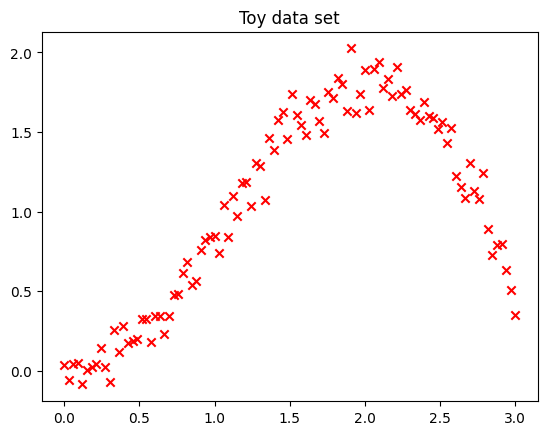

In [36]:
#We first plot the toy data set
x = np.linspace (0 , 3, 100)
y = np.zeros_like(x)
e = np.random.normal(0, 0.1, 100)
#Adding the noise function and then plotting
y = x*np.sin(x) + e
plt.scatter(x, y, color = 'red', marker = 'x')
plt.title('Toy data set')
plt.show()

PART 2 - Apply cross-validation *(80 points)*

Recreate the top panel of Figure 8.14: rms error vs. polynomial degree for the training set and cross-validation set. To do this, you will perform the ff. steps:

1. Split the data set into training, cross-validation, and test sets with 50%, 25% and 25% ratio. You can use sklearn library's model_selection.train_test_split function [(link)](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). *(20 pts.)*
2. Get the best-fit curve for polynomial degrees $d=0$ to 14 for the training set. You can use numpy library's polyfit function [(link)](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html). *(30 pts.)*
3. Get the rms errors for both the training and cross-validation sets (for the best-fit curve from Step 2). *(10 pts.)*
4. Plot rms errors for both the training and cross-validation sets against polynomial degree $d$ (as in Fig. 8.14). *(20 pts.)*


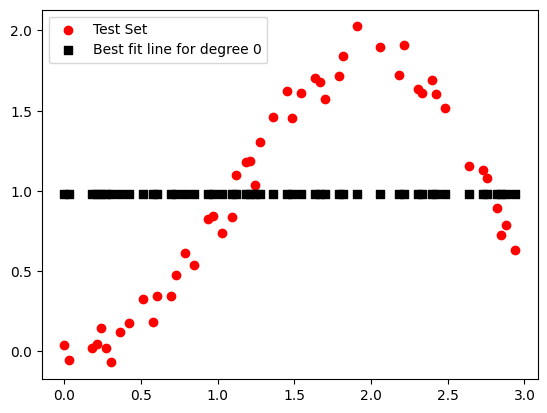

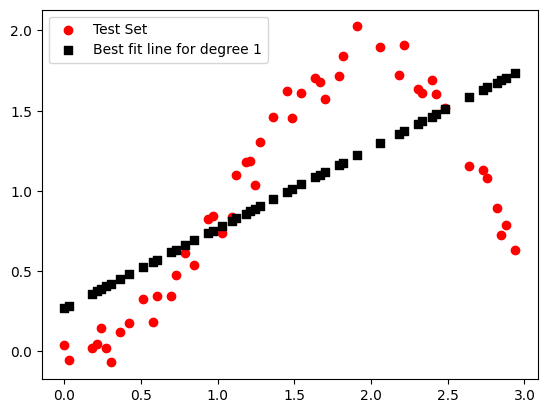

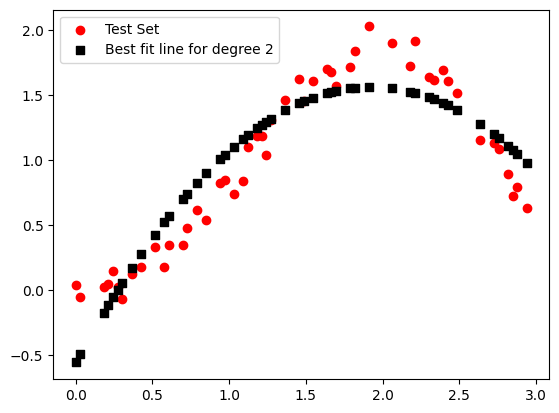

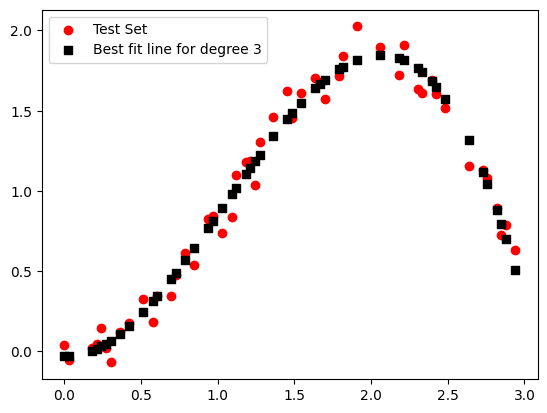

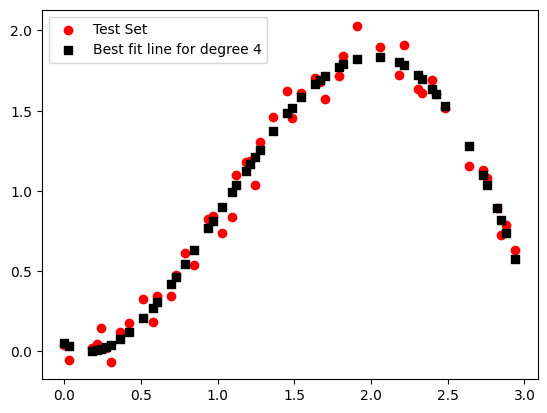

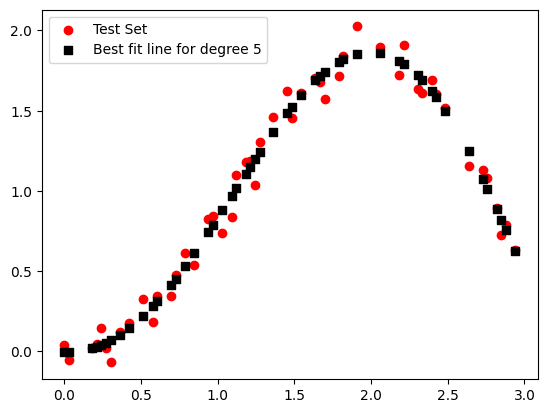

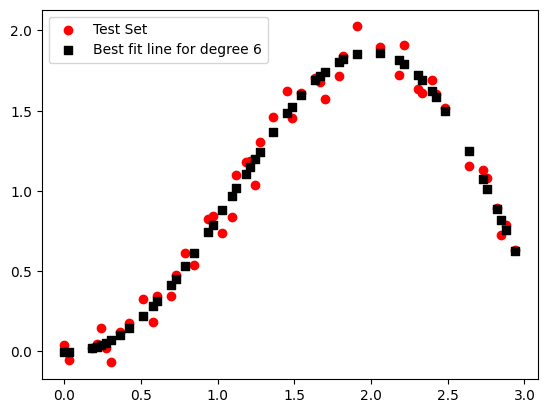

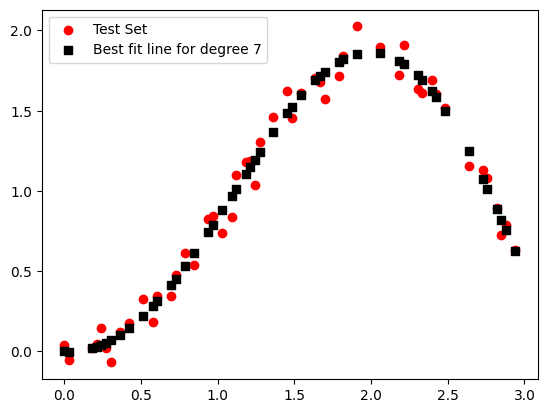

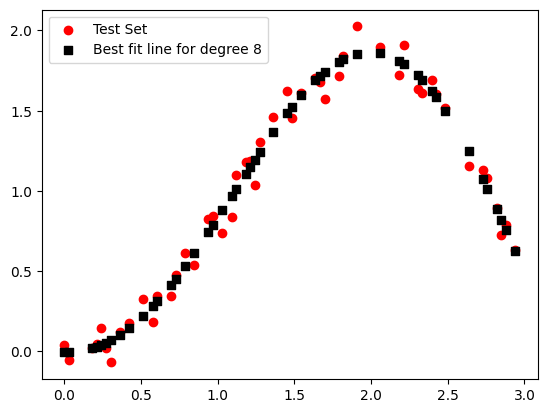

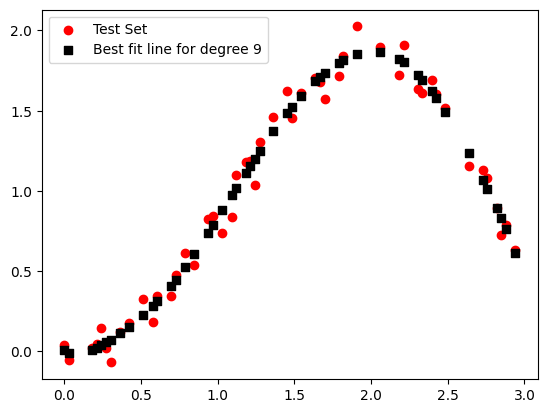

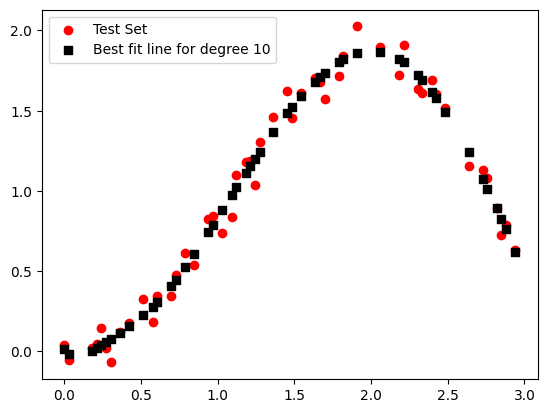

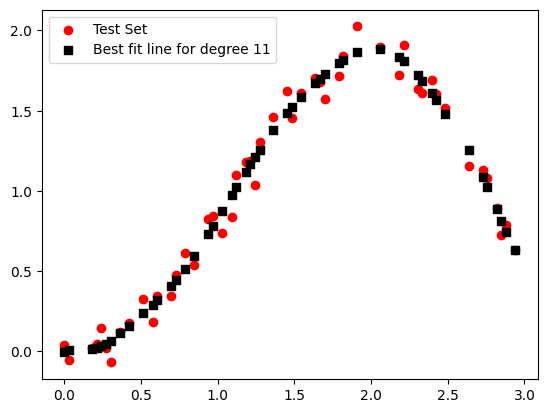

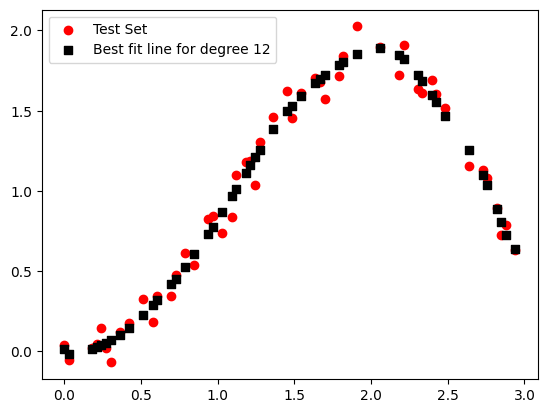

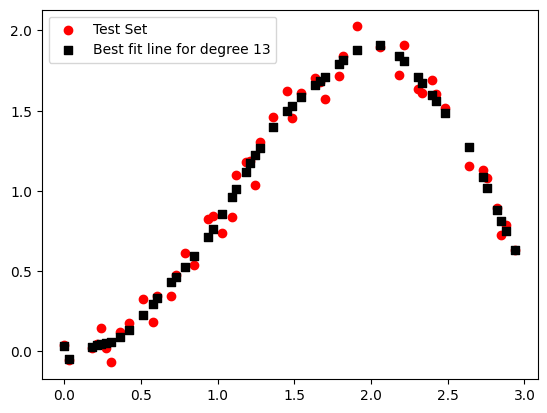

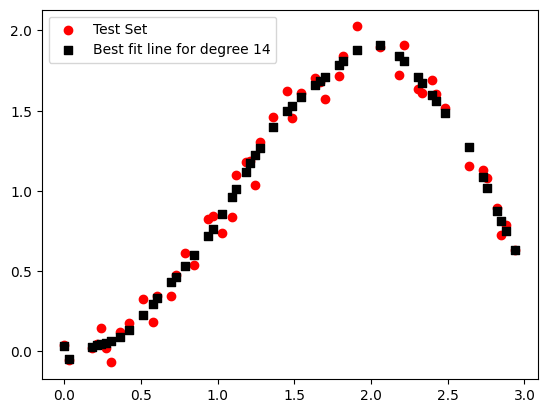

In [37]:
#Now we make the train test split for 50 training points and 50 test + CV points
xtest_cv, xtrain, ytest_cv, ytrain = sklearn.model_selection.train_test_split(x, y, test_size = 0.5, train_size = 0.5)
#Another split to be made to make 25 testing and 25 cross validation points
xtest, xcv, ytest, ycv = sklearn.model_selection.train_test_split(xtest_cv, ytest_cv, test_size = 0.5, train_size = 0.5)
#Call a blank array for the rms values
rms_train= np.zeros(15)
#For loop for both the RMS, and plotting of the best fit curves
for i in range(0, 15):
    #Making a best fit curve for each degree
    yfit = np.polyfit(xtrain, ytrain, i)
    p = np.poly1d(yfit)
    #Getting the RMS for the training data
    rms_train[i] = sklearn.metrics.root_mean_squared_error(ytrain, p(xtrain))
    #Plotting the values
    plt.scatter(xtrain, ytrain, color = 'red', label = 'Test Set')
    plt.scatter(xtrain, p(xtrain),marker = ',', color = '0', label = 'Best fit line for degree' + ' '+ str(i))
    plt.legend()
    plt.show()

In [38]:
#Now we get the RMS of the cross validation data
rms_cv = np.zeros_like(rms_train)
for i in range(0, 15):
    ycvfit = np.polyfit(xcv, p(xcv), i)
    p1 = np.poly1d(ycvfit)
    rms_cv[i] = sklearn.metrics.root_mean_squared_error(ycv, p1(xcv))
#Printing the RMS values of each
print('RMS Training', rms_train)
print('RMS CV', rms_cv)

RMS Training [0.63542471 0.4614354  0.24137712 0.09059956 0.08475658 0.0818096
 0.08180929 0.081809   0.08180899 0.08157108 0.08152763 0.08097677
 0.08040455 0.07933193 0.079327  ]
RMS CV [0.66292792 0.43765333 0.24756911 0.12555153 0.12785933 0.13057284
 0.13039803 0.13072252 0.13204816 0.12837607 0.12820978 0.128809
 0.12668462 0.12724982 0.1272474 ]


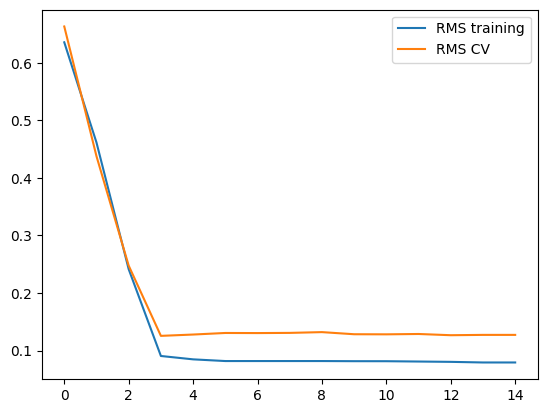

In [39]:
#Now we compare the RMS of the training and CV data by graphing them
plt.plot(rms_train, label = 'RMS training')
plt.plot(rms_cv, label = 'RMS CV')
plt.legend()
plt.show()